# Biodiversity project

This is the biodiversity portfolio project for codecademy. I will be describing the data I find in the csv files entitled 'observations' and 'species_info", and then communicating the finding to the reader.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#first, load the data:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [35]:
#check out the data
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [36]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


I was instructed to perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.

During this project, I will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

In [37]:
#Let's find out the size of each dataframe, and group them by categories that seem important
print(len(obs))

23296


In [38]:
# Group species by category, show overall size
print(species.groupby('category').size())
print('Size of dataframe: {}'.format(len(species)))

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64
Size of dataframe: 5824


In [39]:
# Group observations by park 
print(obs.groupby('park_name').size())
print('Size of dataframe: {}'.format(len(obs)))

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64
Size of dataframe: 23296


We have a dataframe of species that contains 5824 entries, and another dataframe of 23,296 observations of different species in four different National Parks.

We can also see that the plant category in the species dataframe has the most entries, while the observations are equally split across four parks.

Let's see how many null values we have for conservation status, as that's the thing we're particularly interested in.

In [40]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [41]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [42]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

So it looks like the missing values in this dataframe correspond to the species not being endangered. Some googling confirms this for the species I can see in the rows printed earlier.

I'm going to fill in the value 'Not endangered' for these entries.

In [43]:
#fill in not endangered
species.fillna('Not protected',inplace=True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not protected
1,Mammal,Bos bison,"American Bison, Bison",Not protected
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not protected
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not protected
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not protected


We saw above that 161 species are 'of concern', 16 are endangered, 10 are threatened and just 4 are in recovery. 5633 are not endangered at all.

I'm going to show the species who are under some degree of threat on a bar chart.

In [44]:
#First, ignore the non-endangered species
ed_species = species[
    species.conservation_status != 'Not protected'].groupby([
    'conservation_status','category'])['scientific_name'].count().unstack()
ed_species.head()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


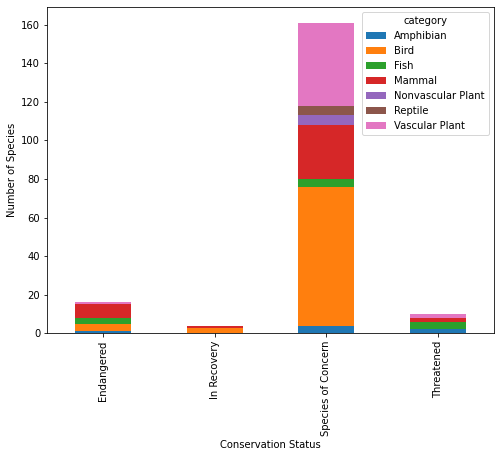

In [45]:
ax = ed_species.plot(kind='bar',figsize=(8,6),stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.show()

There are a lot of 'species of concern', and birds and vascular plants make up the bulk of that category. 

Analysis

I want to find out if there's any correlation between the type of species and endangered status.


In [46]:
Xtab = pd.crosstab(species['category'],species['conservation_status'])
Xtab

conservation_status,Endangered,In Recovery,Not protected,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,73,4,2
Bird,4,3,442,72,0
Fish,3,0,116,4,4
Mammal,7,1,176,28,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,74,5,0
Vascular Plant,1,0,4424,43,2


This isn't especially clear -- let's create a category called 'protected' for an easier comparison.

In [58]:
species['protected'] = species.conservation_status!='Not protected'

In [70]:
by_category = species.groupby(['category','protected']                    
    ).scientific_name.nunique().reset_index().pivot(
    columns='protected',index='category',
    values='scientific_name').reset_index()
by_category.columns = ['category','not protected','protected']
by_category

,category,not protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Let's calculate the percentage of each animal family that is protected

In [73]:
by_category['percentage protected'] = (
    by_category['protected']/(by_category['not protected']+by_category['protected']))*100
by_category

,category,not protected,protected,percentage protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Now we're going to use some statistical techniques to figure out whether these percentages could simply be the result of chance, or whether they're 'statistically significant'.

Let's start by looking at amphibians and mammals in contingency1.

In [89]:
from scipy.stats import chi2_contingency
contingency1 = [[72,7],
                 [146,30]]

In [90]:
stat, p, dof, expected = chi2_contingency(contingency1)
print(p)

0.12757669693198975


I've printed the p-value above this cell. It was 0.1276, which is well above the 0.05 value that is usually used to indicate statistical significance. There is no relationship between amphibians and mammals.

Next I'll look at plants and vascular plants

In [91]:
contingency2 = [[328,5],
                 [4216,46]]

In [92]:
stat, p, dof, expected = chi2_contingency(contingency2)
print(p)

0.6623419491381985


Being a vascular or nonvascular plant does not have a statistically significant impact on how endangered an animal is, the p-value is way too high.

Let's return to the park data.

In [22]:
#Just to reminder ourselves of the park data, here are the first few entries:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


I'm going to merge the two tables so that I can analyse the data more easily.

In [23]:
combined = obs.merge(species, how = 'left', on='scientific_name')
combined.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not endangered
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not endangered
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not endangered
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not endangered
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not endangered


In [24]:
#combined['is_deer'] = combined.common_names.str.contains(r"\bison\b",regex=True)
#combined.head()

In [25]:
#combined[combined.is_deer]

Let's figure out which species in our combined table are endangered.

In [26]:
endangered = combined[combined.conservation_status == 'Endangered'].groupby(combined.common_names)
endangered.size()

common_names
Bachman's Warbler, Bachman's Wood Warbler                       4
California Condor                                               4
Carolina Northern Flying Squirrel, Northern Flying Squirrel     4
Duskytail Darter                                                4
Gray Myotis                                                     4
Gray Wolf                                                      12
Gray Wolf, Wolf                                                12
Indiana Bat, Indiana Or Social Myotis                           4
June Sucker                                                     4
Mountain Avens, Spreading Avens                                 4
Red Wolf                                                        4
Red-Cockaded Woodpecker                                         4
Sierra Nevada Bighorn Sheep                                     4
Sierra Nevada Yellow-Legged Frog                                4
Smoky Madtom                                                   

I'd like to find out which park has the most sightings of endangered species.

In [27]:
end_ = combined[combined.conservation_status=='Endangered']
end_.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
298,Picoides borealis,Yosemite National Park,43,Bird,Red-Cockaded Woodpecker,Endangered
538,Rana sierrae,Yosemite National Park,42,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered
1046,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered
1402,Etheostoma percnurum,Yellowstone National Park,70,Fish,Duskytail Darter,Endangered
1434,Canis lupus,Yosemite National Park,35,Mammal,Gray Wolf,Endangered


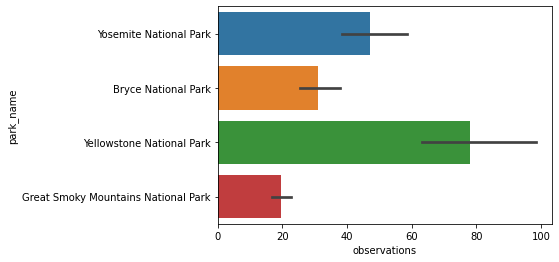

In [28]:
sns.barplot(x = end_.observations, y = end_.park_name)
plt.show()

Turns out Yellowstone has the most sightings of endangered species!